In [289]:
# importing all necessary and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.summarization.bm25 import get_bm25_weights
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords 
import sklearn
import math
from sklearn.cluster import KMeans

## Fetching Data

In [290]:
data = pd.read_csv("tennis_articles_v4.csv")

In [291]:
# viewing data example to know how our data actually lools like
data.head()

,article_id,article_text
0,1,In Drama every world is a stage.
1,2,Everyone on the stage is doing drama .
2,3,Every world is a stage and is commonly said i...
3,4,The world commonly revolves around Drama and S...
4,5,Drama in every world leads to removal of stage...


In [292]:
#splitting the documents into list of sentences.
sentences = [] 
for s in data['article_text']:
    sentences.append(sent_tokenize(s))
sentences = [[y] for x in sentences for y in x] # flatten list

In [293]:
sentences[:5]

[['In Drama every world is a stage.'],
 ['Everyone on the stage is doing drama .'],
 ['Every world is a  stage and is commonly said in drama.'],
 ['The world commonly revolves around Drama and Stage.'],
 ['Drama in every world leads to removal of stage fear.']]

In [294]:
word_sentence=[]
for i in sentences:
    for j in i:
        word_sentence.append(word_tokenize(j))
word_sentence

[['In', 'Drama', 'every', 'world', 'is', 'a', 'stage', '.'],
 ['Everyone', 'on', 'the', 'stage', 'is', 'doing', 'drama', '.'],
 ['Every',
  'world',
  'is',
  'a',
  'stage',
  'and',
  'is',
  'commonly',
  'said',
  'in',
  'drama',
  '.'],
 ['The',
  'world',
  'commonly',
  'revolves',
  'around',
  'Drama',
  'and',
  'Stage',
  '.'],
 ['Drama',
  'in',
  'every',
  'world',
  'leads',
  'to',
  'removal',
  'of',
  'stage',
  'fear',
  '.'],
 ['Every',
  'where',
  'in',
  'the',
  'world',
  'Drama',
  'is',
  'performed',
  'with',
  'great',
  'pomp',
  'and',
  'show',
  '.'],
 ['Character',
  'building',
  'is',
  'an',
  'integral',
  'part',
  'of',
  'Drama',
  'which',
  'is',
  'included',
  'in',
  'every',
  'part',
  'of',
  'the',
  'world',
  '.'],
 ['Setting',
  'of',
  'the',
  'Stage',
  'is',
  'very',
  'important',
  'in',
  'drama',
  '.'],
 ['Language',
  'of',
  'the',
  'play',
  'in',
  'Drama',
  'is',
  'very',
  'important',
  'as',
  'it',
  'is',
  

In [295]:
#removal of stop words
stop_words = set(stopwords.words('english')) 
line=[]
filtered_sentence=[]

for i in word_sentence:
    for j in i:
        if not j in stop_words:
            line.append(j)
    filtered_sentence.append(line)
    line=[]

In [296]:
filtered_sentence

[['In', 'Drama', 'every', 'world', 'stage', '.'],
 ['Everyone', 'stage', 'drama', '.'],
 ['Every', 'world', 'stage', 'commonly', 'said', 'drama', '.'],
 ['The', 'world', 'commonly', 'revolves', 'around', 'Drama', 'Stage', '.'],
 ['Drama', 'every', 'world', 'leads', 'removal', 'stage', 'fear', '.'],
 ['Every', 'world', 'Drama', 'performed', 'great', 'pomp', 'show', '.'],
 ['Character',
  'building',
  'integral',
  'part',
  'Drama',
  'included',
  'every',
  'part',
  'world',
  '.'],
 ['Setting', 'Stage', 'important', 'drama', '.'],
 ['Language',
  'play',
  'Drama',
  'important',
  'considered',
  'integral',
  'part',
  'every',
  'part',
  'world',
  '.'],
 ['Drama',
  'leads',
  'overall',
  'devlopment',
  'individual',
  'practiswed',
  'every',
  'part',
  'world',
  '.'],
 ['The',
  'Discipline',
  ',',
  'Dedication',
  ',',
  'Organization',
  'sense',
  'collaboartion',
  'Theatre',
  'requires',
  'ar',
  'qualities',
  'easily',
  'transfer',
  'number',
  'fields',
  '

In [297]:
#stemming the words
from nltk.stem import PorterStemmer 
ps = PorterStemmer()
stemmed_sentences=[]
line=[]
for i in filtered_sentence:
    for j in i:
       line.append(ps.stem(j))
    stemmed_sentences.append(line)
    line=[]

In [298]:
stemmed_sentences

[['In', 'drama', 'everi', 'world', 'stage', '.'],
 ['everyon', 'stage', 'drama', '.'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama', '.'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage', '.'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear', '.'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show', '.'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world',
  '.'],
 ['set', 'stage', 'import', 'drama', '.'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world',
  '.'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world',
  '.'],
 ['the',
  'disciplin',
  ',',
  'dedic',
  ',',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field',
  '.'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',

In [299]:
# remove punctuations, numbers and special characters
alphabetic_sentences=[]
line=[]
for i in stemmed_sentences:
    line.append(pd.Series(i).str.replace("[^a-zA-Z]", " "))
    
    
    alphabetic_sentences.append(line)
    line=[]

In [300]:
line = []

for i in alphabetic_sentences:
   
    for j in i:
        l=[]
        for x in j.values:
            if not x ==' ':
                l.append(x.lower())
        line.append(l)
line

[['in', 'drama', 'everi', 'world', 'stage'],
 ['everyon', 'stage', 'drama'],
 ['everi', 'world', 'stage', 'commonli', 'said', 'drama'],
 ['the', 'world', 'commonli', 'revolv', 'around', 'drama', 'stage'],
 ['drama', 'everi', 'world', 'lead', 'remov', 'stage', 'fear'],
 ['everi', 'world', 'drama', 'perform', 'great', 'pomp', 'show'],
 ['charact',
  'build',
  'integr',
  'part',
  'drama',
  'includ',
  'everi',
  'part',
  'world'],
 ['set', 'stage', 'import', 'drama'],
 ['languag',
  'play',
  'drama',
  'import',
  'consid',
  'integr',
  'part',
  'everi',
  'part',
  'world'],
 ['drama',
  'lead',
  'overal',
  'devlop',
  'individu',
  'practisw',
  'everi',
  'part',
  'world'],
 ['the',
  'disciplin',
  'dedic',
  'organ',
  'sens',
  'collaboart',
  'theatr',
  'requir',
  'ar',
  'qualiti',
  'easili',
  'transfer',
  'number',
  'field'],
 ['theatr',
  'lead',
  'key',
  'four',
  'term',
  'import',
  'individu',
  'lifei e ',
  'disciplin',
  'dedic',
  'organ',
  'sens',
 

In [301]:
len(line)

39

In [302]:
words=[]
words=[y for x in line for y in x ]

#Taking all distinct words in an array
Distinct_Words=[y for y in set(words)]

In [303]:
Distinct_Words

['i e ',
 'said',
 'charact',
 'bone',
 'young',
 'etc',
 'pactic',
 'cinema',
 'film',
 'know',
 'freedom',
 'collbaor',
 'newspaer',
 'address',
 'time',
 'take',
 'individu',
 'integr',
 'need',
 'embib',
 'artist',
 'struggl',
 'work',
 'diciplin',
 'everyon',
 'lovinf',
 'televis',
 'social',
 'pillar',
 'measur',
 'program',
 'knowledg',
 'india',
 'indian',
 'while',
 'practisw',
 'around',
 'fim',
 'e ',
 'transfer',
 'enertatin',
 'succes',
 'make',
 'great',
 'befor',
 'life',
 'peopl',
 'back',
 'influenti',
 'play',
 'villag',
 'enertain',
 'four',
 'd',
 'ar',
 'biopic',
 'non',
 'depict',
 'collboart',
 'thing',
 'bring',
 'collabor',
 'commun',
 'drama',
 'perosan',
 'overal',
 'opf',
 'must',
 'smooth',
 'sc',
 'like',
 'educ',
 'abbrev',
 'type',
 'awar',
 'stage',
 'one',
 'societi',
 'advertis',
 'file',
 'trm',
 'theatr',
 'consid',
 'revolv',
 'includ',
 'inform',
 'qualiti',
 'era',
 'boost',
 'serv',
 'thyan',
 'purpos',
 'happen',
 'mind',
 'old',
 'stand',
 'in

In [304]:
words

['in',
 'drama',
 'everi',
 'world',
 'stage',
 'everyon',
 'stage',
 'drama',
 'everi',
 'world',
 'stage',
 'commonli',
 'said',
 'drama',
 'the',
 'world',
 'commonli',
 'revolv',
 'around',
 'drama',
 'stage',
 'drama',
 'everi',
 'world',
 'lead',
 'remov',
 'stage',
 'fear',
 'everi',
 'world',
 'drama',
 'perform',
 'great',
 'pomp',
 'show',
 'charact',
 'build',
 'integr',
 'part',
 'drama',
 'includ',
 'everi',
 'part',
 'world',
 'set',
 'stage',
 'import',
 'drama',
 'languag',
 'play',
 'drama',
 'import',
 'consid',
 'integr',
 'part',
 'everi',
 'part',
 'world',
 'drama',
 'lead',
 'overal',
 'devlop',
 'individu',
 'practisw',
 'everi',
 'part',
 'world',
 'the',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collaboart',
 'theatr',
 'requir',
 'ar',
 'qualiti',
 'easili',
 'transfer',
 'number',
 'field',
 'theatr',
 'lead',
 'key',
 'four',
 'term',
 'import',
 'individu',
 'lifei e ',
 'disciplin',
 'dedic',
 'organ',
 'sens',
 'collabor',
 'qualiti',
 'requir',
 'wor

## Visualizing Data

In [305]:
for i in range(len(Distinct_Words)):
    print (i,Distinct_Words[i])

0 i e 
1 said
2 charact
3 bone
4 young
5 etc
6 pactic
7 cinema
8 film
9 know
10 freedom
11 collbaor
12 newspaer
13 address
14 time
15 take
16 individu
17 integr
18 need
19 embib
20 artist
21 struggl
22 work
23 diciplin
24 everyon
25 lovinf
26 televis
27 social
28 pillar
29 measur
30 program
31 knowledg
32 india
33 indian
34 while
35 practisw
36 around
37 fim
38 e 
39 transfer
40 enertatin
41 succes
42 make
43 great
44 befor
45 life
46 peopl
47 back
48 influenti
49 play
50 villag
51 enertain
52 four
53 d
54 ar
55 biopic
56 non
57 depict
58 collboart
59 thing
60 bring
61 collabor
62 commun
63 drama
64 perosan
65 overal
66 opf
67 must
68 smooth
69 sc
70 like
71 educ
72 abbrev
73 type
74 awar
75 stage
76 one
77 societi
78 advertis
79 file
80 trm
81 theatr
82 consid
83 revolv
84 includ
85 inform
86 qualiti
87 era
88 boost
89 serv
90 thyan
91 purpos
92 happen
93 mind
94 old
95 stand
96 in
97 lost
98 role
99 organ
100 collaboart
101 exist
102 therer
103 field
104 help
105 issu
106 devlop
107 

In [306]:
word_occurance_matrix=np.empty(shape=(len(line),len(Distinct_Words)))
word_occurance_matrix.fill(0)

In [307]:
for i in range(len(line)):
    for j in range(len(line[i])):
        for x in range(len(Distinct_Words)):
            if (Distinct_Words[x]==line[i][j]):
                word_occurance_matrix[i][x] = word_occurance_matrix[i][x] +1
                continue

In [308]:
print(word_occurance_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## tf-idf

In [309]:
isf=np.array(np.log(len(line)/np.count_nonzero(word_occurance_matrix,axis=0)))
word_weight_matrix=(word_occurance_matrix*isf)
word_weight_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.66356165, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.7176515 ]])

## Cosine Similarity

In [310]:
similarity_matrix=np.empty(shape=(len(line),len(line)))

for i in range(len(line)):
    for j in range(len(line)):
        dot_product = np.dot(word_weight_matrix[i], word_weight_matrix[j])
        norm_i = np.linalg.norm(word_weight_matrix[i])
        norm_j = np.linalg.norm(word_weight_matrix[j])
        similarity_matrix[i, j] = dot_product/(norm_i*norm_j)
similarity_matrix

array([[1.        , 0.23953498, 0.40167151, ..., 0.        , 0.        ,
        0.        ],
       [0.23953498, 1.        , 0.18265108, ..., 0.        , 0.        ,
        0.        ],
       [0.40167151, 0.18265108, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.1124214 ,
        0.26025814],
       [0.        , 0.        , 0.        , ..., 0.1124214 , 1.        ,
        0.03007171],
       [0.        , 0.        , 0.        , ..., 0.26025814, 0.03007171,
        1.        ]])

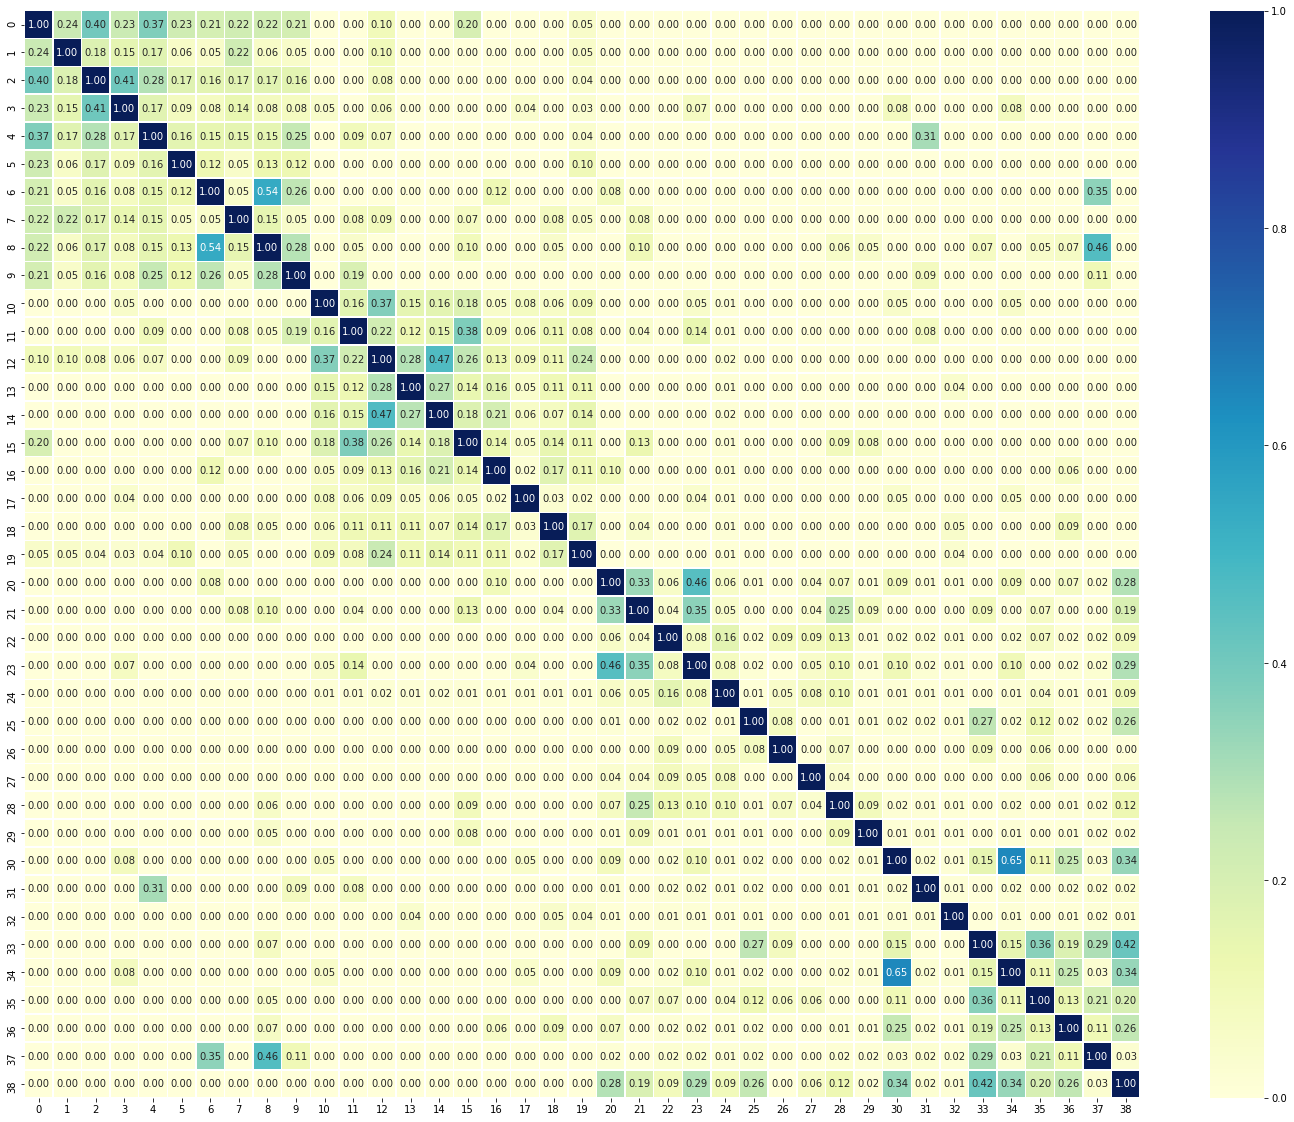

In [311]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(similarity_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

In [312]:
distance_matrix=1-similarity_matrix

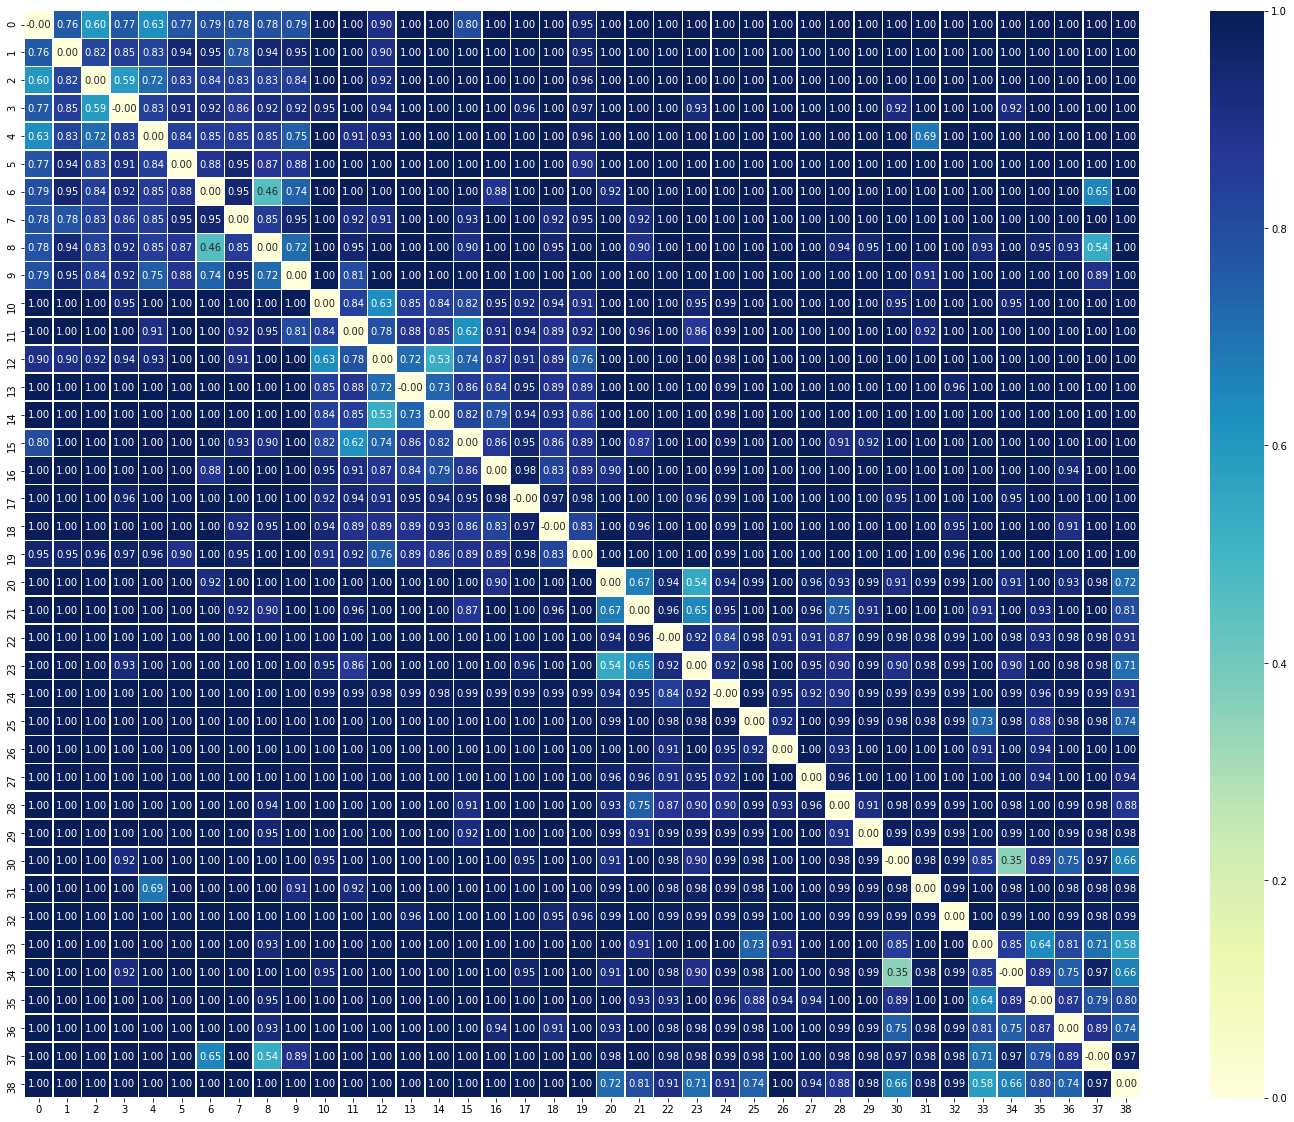

In [313]:
f,ax = plt.subplots(figsize=(25, 20))
sns.heatmap(distance_matrix, annot=True, linewidths=.5, fmt= '.2f', cmap="YlGnBu")

plt.show()

## Clustering

### K-Medoids

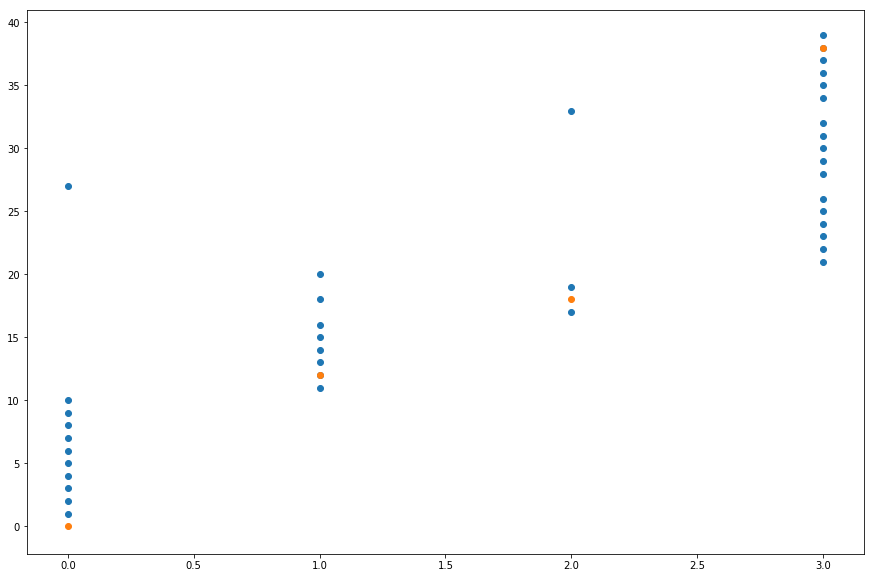

In [314]:
from pyclustering.cluster import kmedoids
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C

##############################################################################################################################

matrix = distance_matrix
M, C = kMedoids(matrix, 4)


##############################################################################################################################

a=np.empty(shape=len(line))
for i in range(len(C)):
    for j in (C[i]):
        a[j]=i
    
#print(a)
arr = [1, 2, 3 ,4, 5 , 6, 7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,39]
m=[0,1,2,3]

plt.figure(figsize=(15,10))
plt.scatter(a, arr)
plt.scatter(m,M)

### K-Means

[3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 2 0 0 2 2 2 2 2 1 2 2 2 2 1 3 2 1 1 1 1
 1 1]


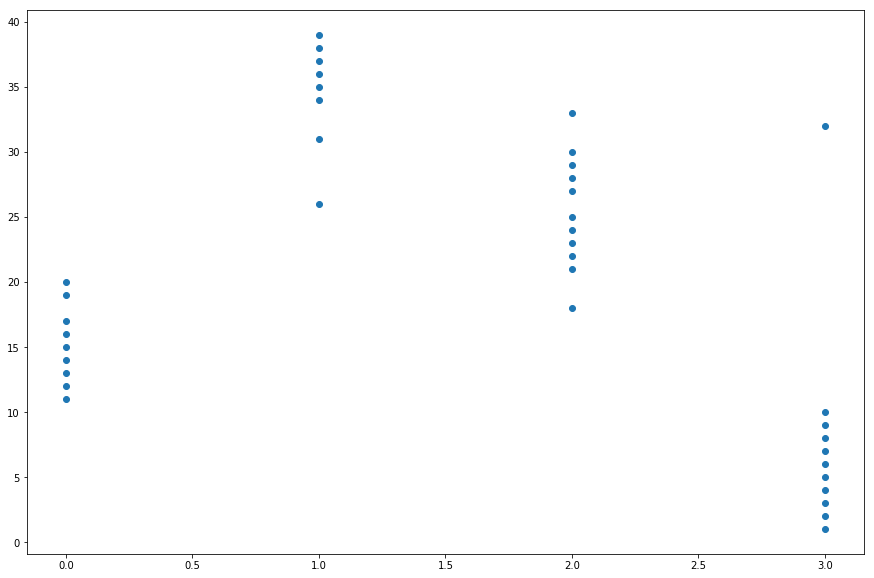

In [315]:
mat = distance_matrix

kmeans = KMeans(n_clusters=4, init='k-means++').fit_predict(mat)
print(kmeans)
arr = [1, 2, 3 ,4, 5 , 6, 7, 8, 9, 10, 11 , 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,39]

plt.figure(figsize=(15,10))
plt.scatter(kmeans, arr)